## Housing Tred Exploratory Data Analysis

Get the average median income of the data set and check the distribution of data using appropriate plots. 

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

data=pd.read_excel(r'C:\Users\Amol\Downloads\housing.xlsx',sheet_name='housing')
data.info()
print()

median_income=data['median_income'].mean()                    #avg of the column 'median_income'
print('Avg. median income :',median_income)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB

Avg. median income : 3.8706710029069766


In [28]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


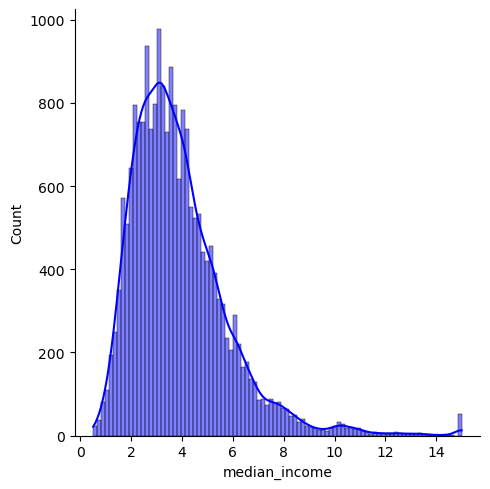

In [69]:
sns.displot(data['median_income'], kde=True,color='blue',edgecolor='k'
plt.show()

# The graph is right skewed,it means the mean(avg.) is greater than the median, hence it is positively skewed.


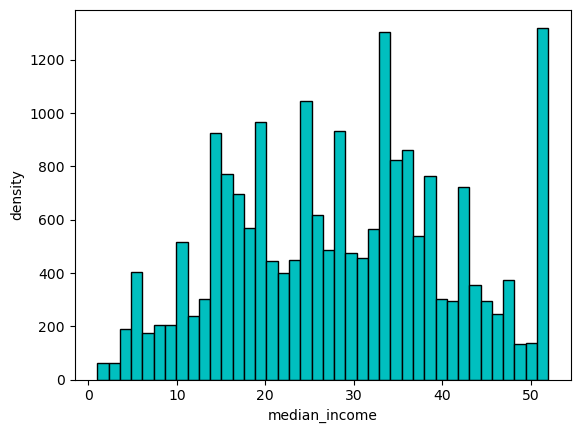

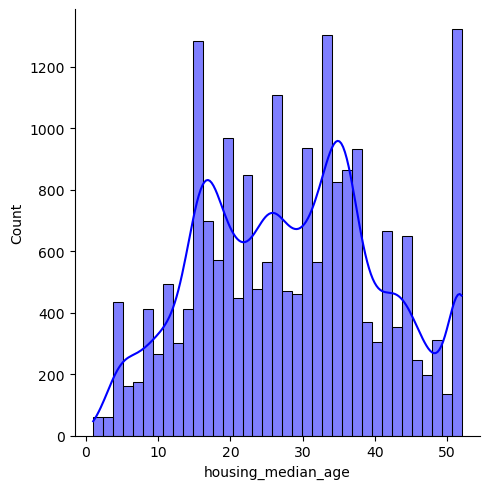

In [60]:
# The distribution of housing_median_age.

plt.hist(data['housing_median_age'],bins=40,color='c',edgecolor='k')
plt.xlabel('median_income')
plt.ylabel('density')
plt.title=('Volume')
plt.show()

sns.displot(data['housing_median_age'],kde=True,color='blue',edgecolor='k')
plt.show()

#Here we don't get any perticular pattern like normal distribution,right-skewed,left-skewed. 
#Also niether it is directly nor inversely proportional 



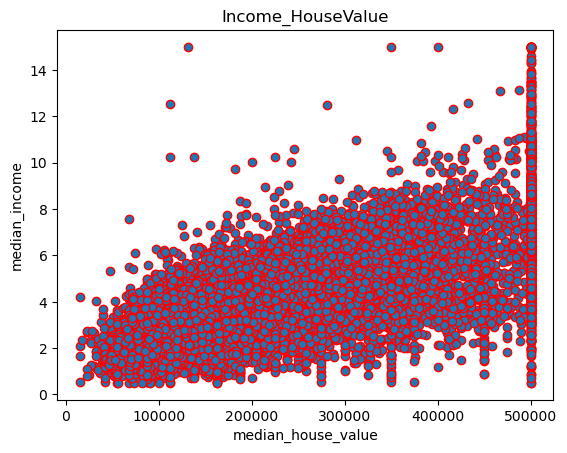

In [2]:
# Relation between median_income and median_house_values.

plt.scatter(data['median_house_value'],data['median_income'],edgecolor='r')

plt.xlabel('median_house_value')
plt.ylabel('median_income')
plt.title('Income_HouseValue')

plt.show()

#The plot suggests that the data distribution is directly proportional.
#higher the median income increases, higher is the house value.  


In [3]:
# deleting the corresponding examples from the data set for which total_bedrooms are not available.

data                                                     #total rows are 20640
data.isnull().sum()                                      # 207 values of 'total_bedroom' are null

Null_bedrooms=data.dropna(subset=['total_bedrooms'])     #all the null values will be deleted from the column 'total_bedrooms'. 

Null_bedrooms                                            # after droping 207 rows we get the output 20433 rows

Null_bedrooms.isnull().sum()                             #here we can cross check

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [72]:
# filling the missing data with the mean value of the total_bedrooms in the original data set.

fill_mean=data.fillna(data['total_bedrooms'].mean())       # it will fill all the null values corresponding to 'total_bedrooms'
fill_mean

fill_mean.isnull().sum()                                  #Here we can cros check if all the null values are filled


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [27]:
# Programming a construct to calculate the median value of the data set wherever required.

# we are working on 'housing_median_age' parameter here.

def cal_median_age(data):
    
    sorted_ages=sorted(data)
    n=len(data)
    
    if n%2==0:
        median=(sorted_ages[n//2-1]+sorted_ages[n//2])/2
        
    else:
        median=[n//2]
        
    return median
median_age=cal_median_age(data['housing_median_age'])
print('median_age :', median_age)                               
                               



median_age : 29.0


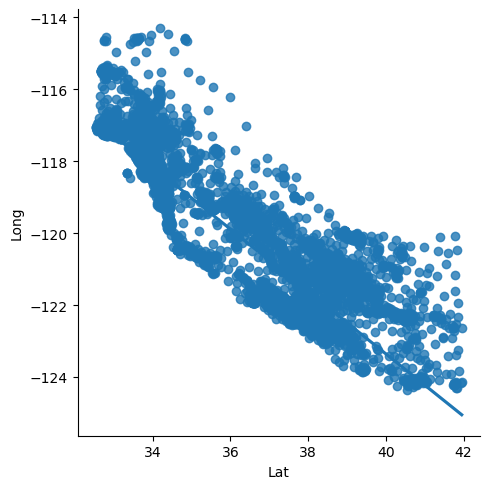

In [41]:
# Ploting latitude versus longitude
.

      
sns.lmplot(x='latitude',y='longitude',data=data,fit_reg=True,)
#plt.scatter(data['latitude'],data['longitude'],marker='o',edgecolor='c')         
plt.xlabel("Lat")
plt.ylabel("Long")

plt.show() 

#Here I have used regression plot to show the linear regression.
#The plot suggests that the latitude and longitude are inversely proportional

In [7]:
# Creating a data set for which the ocean_proximity is ‘Near ocean’

near_ocean = data[data['ocean_proximity'] == 'NEAR OCEAN']     #returns 2658 rows where 'ocean_proximity' is 'Near OCEAN'
near_ocean


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


In [8]:
# Finding the mean and median of the median income for the dataset.

print('mean_value :', near_ocean.mean())
print()
print('median_value :',near_ocean.median())


mean_value : longitude               -119.332555
latitude                  34.738439
housing_median_age        29.347254
total_rooms             2583.700903
total_bedrooms           538.615677
population              1354.008653
households               501.244545
median_income              4.005785
median_house_value    249433.977427
dtype: float64

median_value : longitude               -118.26000
latitude                  33.79000
housing_median_age        29.00000
total_rooms             2195.00000
total_bedrooms           464.00000
population              1136.50000
households               429.00000
median_income              3.64705
median_house_value    229450.00000
dtype: float64


C:\Users\Amol\AppData\Local\Temp\ipykernel_16556\1571864225.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('mean_value :', near_ocean.mean())
C:\Users\Amol\AppData\Local\Temp\ipykernel_16556\1571864225.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('median_value :',near_ocean.median())


In [89]:
# Here we will create a new column named total_bedroom_size. If the total bedrooms are 10 or less, it should be quoted as small. 
#If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

def classify_bedroom_size(num):
    if num<=10:
        return('small')
    elif num<=1000:
        return('medium')
    else:
        return('large')
               
data['total_bedroom_size'] =data['total_bedrooms'].apply(classify_bedroom_size) 

            
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [19]:
# We will make a new column 'Rank' for indexing. For that we have to sort data with any column

data_sorted=data.sort_values(by='total_rooms')

data_sorted['Rank']=range(1,len(data_sorted)+1)

data.set_index(data_sorted['Rank'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
Rank,,,,,,,,,,
1,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20636,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20637,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20638,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND


In [23]:
#To find the if there is any correlation among the columns

data_corr=data.corr()
data_corr

C:\Users\Amol\AppData\Local\Temp\ipykernel_10996\3700139792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr=data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

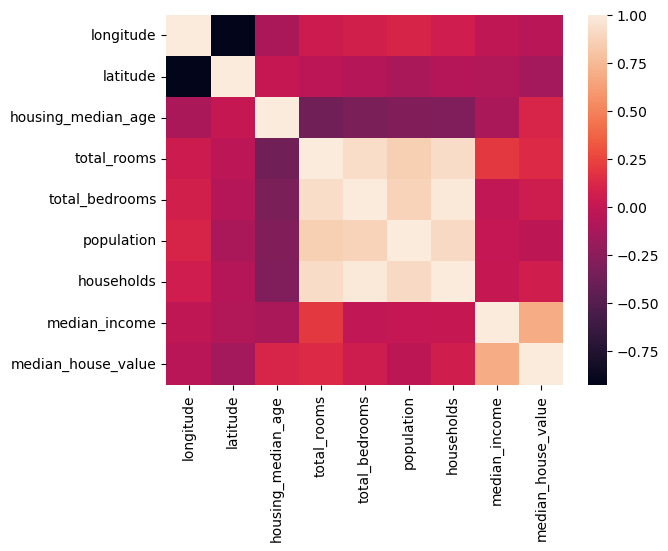

In [24]:
sns.heatmap(data=data_corr)

COrrelation**** 
1.Here we can see there is a strong correlation between 'median_income' and 'median_house_value'.

As the value of 'median_income' is increasing, the valuse of 'median_house_value' is also increasing